<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/4-2%20%ED%99%95%EB%A5%A0%EC%A0%81%20%EA%B2%BD%EC%82%AC%20%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법

## SGDClassifier

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, SGDRegressor

In [5]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [12]:
fish_input = fish.iloc[:, 1:].values
fish_target = fish.iloc[:, 0].to_numpy()

In [13]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [15]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [17]:
from sklearn.linear_model import SGDClassifier

In [19]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) # 'log" means logistic loss function, max_iter: epoch과 같은 의미

In [20]:
sc.fit(train_scaled, train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [21]:
train_score = sc.score(train_scaled, train_target)
test_score = sc.score(test_scaled, test_target)
print(f'train score: {train_score:.4f} \n test score: {test_score:.4f}')

train score: 0.7731 
 test score: 0.7750


In [22]:
sc.partial_fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=10, random_state=42)

sc.fit을 사용하면 앞에서 수행한 내용을 무시하고 처음부터 수행하게 되지만, partial_fit를 사용하면 앞에서 계산된 가중치, 바이어스를 그대로 사용하면서 update시키는 역할을 하게 됨.

In [23]:
train_score = sc.score(train_scaled, train_target)
test_score = sc.score(test_scaled, test_target)
print(f'train score: {train_score:.4f} \n test score: {test_score:.4f}')

train score: 0.8151 
 test score: 0.8500


높게 나옴 <br> SGDClassifier 이름에서 처럼 확률적 경사하강법만 지원하고 batch 경사하강법이나 minibatch 경사하강법은 지원하지 않음.

## 에포크와 과대/과소적합

In [33]:
sc = SGDClassifier(loss='log', random_state=42)

In [34]:
train_score = []
test_score = []

In [26]:
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [35]:
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)  
  # .fit이 없이 처음부터 .partial_fit을 사용하기 위하여는 target class 종류를 알려줘야 함.
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

Text(0, 0.5, 'accuracy')

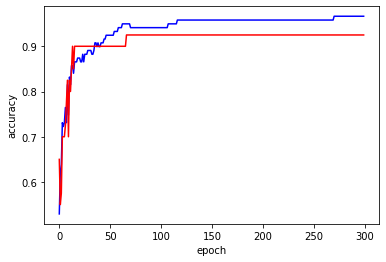

In [39]:
plt.plot(train_score, c='b')
plt.plot(test_score, c='red')
plt.xlabel('epoch')
plt.ylabel('accuracy')

100 epoch부분에서 과소, 과대 없이 최적으로 보이므로 max_iter를 100으로 하고 fit시행

In [40]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)

In [41]:
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [42]:
train_score = sc.score(train_scaled, train_target)
test_score = sc.score(test_scaled, test_target)
print(f'train score: {train_score:.4f} \n test score: {test_score:.4f}')

train score: 0.9580 
 test score: 0.9250


높게 나옴.

In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


loss default value는 hinge함수로 SVM에서 사용함.